In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles 
import sklearn 

In [2]:
df = pd.read_csv('train.tsv',sep='\t')
df

,Unnamed: 0,category,sourcePort,destinationPort,packetSize,word_vector,label
0,0,23,55082,80,282.0,"['0.0000040561', '0.0110203006', '0.0000202803...",1
1,1,11,49096,80,1336.0,"['0.0003691010', '0.0367275751', '0.0760753615...",2
2,2,18,32925,443,548.0,"['0.0014398994', '0.0390070778', '0.2984120546...",1
3,3,18,80,57278,1458.0,"['0.0597254051', '0.0072238334', '0.4154860168...",2
4,4,18,80,56700,1538.0,"['0.0542862358', '0.0358798597', '0.6726926119...",2
...,...,...,...,...,...,...,...
143573,143573,18,80,63160,1538.0,"['0.3877912754', '0.3877953315', '0.3877993875...",2
143574,143574,7,57272,53,300.0,"['0.0574661826', '0.0574702387', '0.0232168570...",2
143575,143575,18,36568,443,701.0,"['0.0003691010', '0.0000202803', '0.0000973453...",1
143576,143576,16,1556,47421,29694.0,"['0.2313451905', '0.0127522359', '0.2204911882...",2


In [5]:
df.describe()

,Unnamed: 0,category,sourcePort,destinationPort,packetSize,label
count,143578.000000,143578.000000,143578.000000,143578.00000,1.435780e+05,143578.000000
mean,71788.500000,13.431905,38371.434579,10753.07754,6.138193e+04,1.500000
std,41447.542812,5.624794,20779.259784,19904.45298,1.592674e+06,0.500002
min,0.000000,1.000000,20.000000,21.00000,9.200000e+01,1.000000
25%,35894.250000,11.000000,33258.000000,80.00000,3.560000e+02,1.000000
50%,71788.500000,14.000000,45584.000000,80.00000,8.110000e+02,1.500000
75%,107682.750000,18.000000,53758.000000,8443.00000,1.538000e+03,2.000000
max,143577.000000,26.000000,65534.000000,65534.00000,1.842923e+08,2.000000


In [6]:
df.shape

(143578, 7)

In [7]:
len(df['destinationPort'].unique())

15547

In [8]:
len(df['sourcePort'].unique())

30205

In [10]:
df['packetSize'].mean()

61381.932301606095

In [4]:
len(df[df['label']==1])

71789

In [5]:
len(df[df['label']==2])

71789

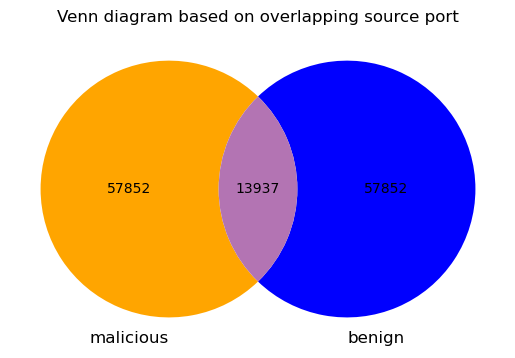

In [6]:
# identify source port is common in both catagori or not (malicious and benign)

uniqueLabel = list(df['label'].unique())
SourcePort = []
for i in range(len(uniqueLabel)):
    SourcePort.append(df[df['label']==uniqueLabel[i]]['sourcePort'].tolist())
commonPort = list(set(SourcePort[0]) & set(SourcePort[1]))
commonPort
data = [len(SourcePort[0])-len(commonPort), len(SourcePort[1])-len(commonPort), len(commonPort)]
venn2(subsets = (data), set_labels = ('malicious' , 'benign'), set_colors=("orange", "blue"), alpha=1) 
plt.title('Venn diagram based on overlapping source port')
plt.show()

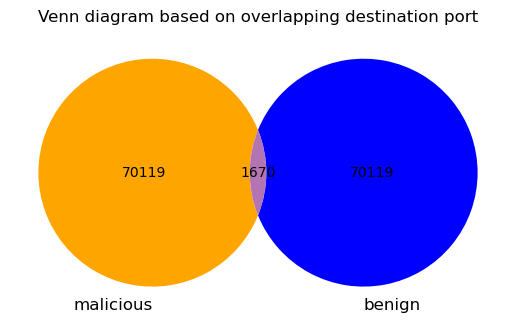

In [7]:
# identify source port is common in both catagori or not (malicious and benign)


uniqueLabel = list(df['label'].unique())
destinationPort = []
for i in range(len(uniqueLabel)):
    destinationPort.append(df[df['label']==uniqueLabel[i]]['destinationPort'].tolist())
    
commonPort1 = list(set(destinationPort[0]) & set(destinationPort[1]))
data = [len(destinationPort[0])-len(commonPort1), len(destinationPort[1])-len(commonPort1), len(commonPort1)]
venn2(subsets = (data), set_labels = ('malicious' , 'benign'), set_colors=("orange", "blue"), alpha=1) 
plt.title('Venn diagram based on overlapping destination port')
plt.show()

In [8]:
# identify source port and destination port common in both catagori or not (malicious and benign)

uniqueLabel = list(df['label'].unique())
SourcePort = []
destinationPort = []
for i in range(len(uniqueLabel)):
    destinationPort.append(df[df['label']==uniqueLabel[i]]['destinationPort'].tolist())
    SourcePort.append(df[df['label']==uniqueLabel[i]]['sourcePort'].tolist())

count = 0
for i in range(len(destinationPort[0])):
    for j in range(len(destinationPort[1])):
        if destinationPort[0][i] == destinationPort[1][j] and SourcePort[0][i] == SourcePort[1][j]:
            count += 1
            break
count

32555

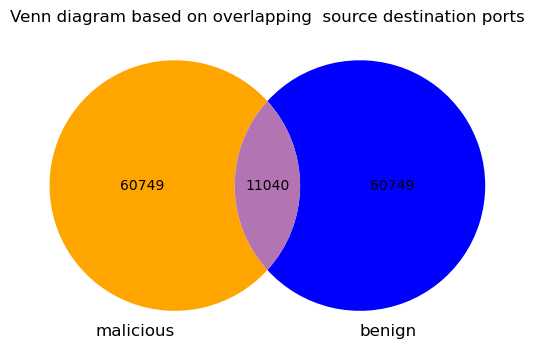

In [9]:
uniqueLabel = list(df['label'].unique())
mDF = df[df['label'] == uniqueLabel[0]]
mDF = mDF[['sourcePort', 'destinationPort']].drop_duplicates()
bDF = df[df['label'] == uniqueLabel[1]]
r,c = mDF.shape
count = 0
for i in range(r):
    #print(mDF['sourcePort'].[i])
    d,c =  bDF[(bDF['sourcePort'] == mDF['sourcePort'].iloc[i]) & (bDF['destinationPort'] == mDF['destinationPort'].iloc[i])].shape
    if d>0:
        count += 1
count
data = [len(destinationPort[0])-count, len(destinationPort[1])-count, count]
venn2(subsets = (data), set_labels = ('malicious' , 'benign'), set_colors=("orange", "blue"), alpha=1) 
plt.title('Venn diagram based on overlapping  source destination ports')
plt.show()

In [10]:
print(df['packetSize'].max(),df['packetSize'].min(),df['packetSize'].mean())

184292264.0 92.0 61381.932301606095


In [11]:
sta = df['packetSize'].describe()
staList = [sta[7],sta[6],sta[5],sta[4],sta[3]]
staList

C:\Users\Sankar Mridha\AppData\Local\Temp\ipykernel_4364\1915090399.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  staList = [sta[7],sta[6],sta[5],sta[4],sta[3]]


[184292264.0, 1538.0, 811.0, 356.0, 92.0]

[12477, 16229, 20738, 22345] [17949, 24345, 15794, 13700]


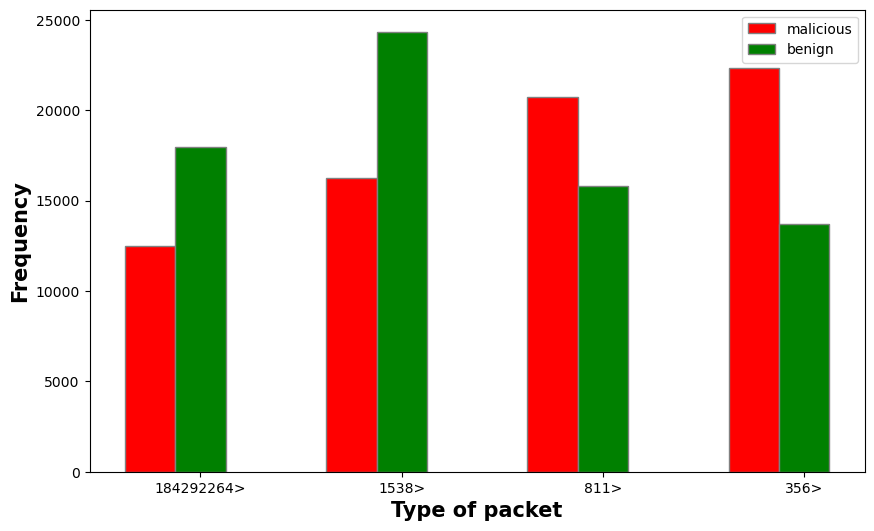

In [12]:
uniqueLabel = list(df['label'].unique())
mDF = df[df['label'] == uniqueLabel[0]]
bDF = df[df['label'] == uniqueLabel[1]]
mCount = []
bCount = []
for i in range(len(staList)-1):
    m,n = mDF[(mDF['packetSize']<=staList[i]) & (mDF['packetSize']>staList[i+1])].shape
    o,p = bDF[(bDF['packetSize']<=staList[i]) & (bDF['packetSize']>staList[i+1])].shape
    mCount.append(m)
    bCount.append(o)
print(mCount,bCount)    

barWidth = 0.25
fig = plt.subplots(figsize =(10, 6))
br1 = np.arange(len(mCount)) 
br2 = [x + barWidth for x in br1]
plt.bar(br1, mCount, color ='r', width = barWidth, edgecolor ='grey', label ='malicious') 
plt.bar(br2, bCount, color ='g', width = barWidth, edgecolor ='grey', label ='benign') 
plt.xlabel('Type of packet', fontweight ='bold', fontsize = 15) 
plt.ylabel('Frequency', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(mCount))], ['184292264>', '1538>', '811>', '356>'])

plt.legend()
plt.show() 

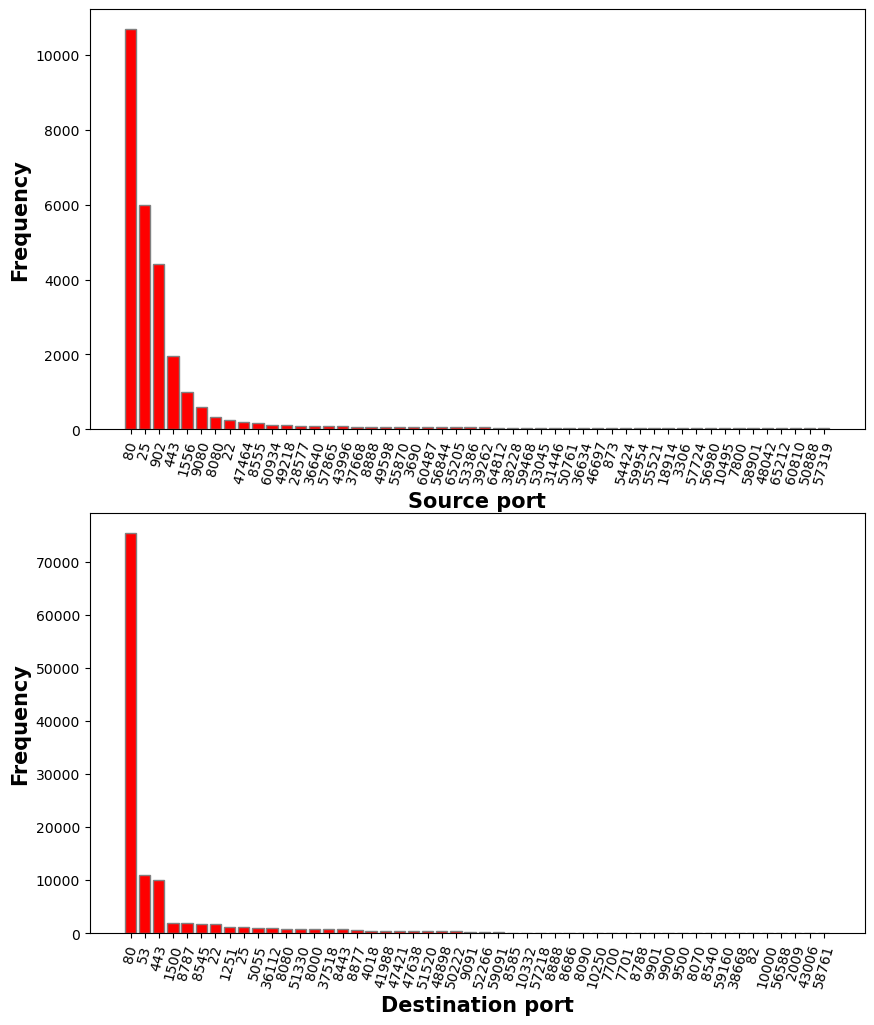

In [13]:
uniqueDestination = df['destinationPort'].unique()
uniqueDestinationCount = [0 for _ in range(len(uniqueDestination))]
for i in range(len(uniqueDestination)):
    uniqueDestinationCount[i] = len(df[df['destinationPort'] == uniqueDestination[i]])
uniqueDestinationCountSort = np.sort(uniqueDestinationCount,axis=None,)[::-1]
index = np.argsort(uniqueDestinationCount)[::-1]
DestinationPort = [uniqueDestination[i] for i in index]


uniqueSource = df['sourcePort'].unique()
uniqueSourceCount = [0 for _ in range(len(uniqueSource))]
for i in range(len(uniqueSource)):
    uniqueSourceCount[i] = len(df[df['sourcePort'] == uniqueSource[i]])
uniqueSourceCountSort = np.sort(uniqueSourceCount,axis=None,)[::-1]
index = np.argsort(uniqueSourceCount)[::-1]
SourcePort = [uniqueSource[i] for i in index]

plt.figure(figsize =(10, 12))
plt.subplot(2, 1, 1)
plt.bar([i for i in range(50)], uniqueSourceCountSort[:50],color ='r', edgecolor ='grey')
plt.xlabel('Source port', fontweight ='bold', fontsize = 15) 
plt.ylabel('Frequency', fontweight ='bold', fontsize = 15) 
plt.xticks([i for i in range(50)], SourcePort[:50],rotation=75)

plt.subplot(2, 1, 2)
plt.bar([i for i in range(50)], uniqueDestinationCountSort[:50],color ='r', edgecolor ='grey')
plt.xlabel('Destination port', fontweight ='bold', fontsize = 15) 
plt.ylabel('Frequency', fontweight ='bold', fontsize = 15) 
plt.xticks([i for i in range(50)], DestinationPort[:50],rotation=75)
plt.show() 

In [14]:
import re
dd = df['word_vector']
wordVector = [re.sub('[^a-zA-Z0-9,.]+', '', d).split(',') for d in dd]


In [15]:
count = 0
for word in wordVector:
    if len(word)>count:
        count = len(word)
count
for i in range(len(wordVector)):
    l =  len(wordVector[i])
    for _ in range(count-l):
        wordVector[i].append(0)
#wordVector

In [16]:
newdataFrame = pd.DataFrame(wordVector)
newdataFrame

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
0,0.0000040561,0.0110203006,0.0000202803,0.0000973453,0.8533533432,0.0000243363,0.0739094283,0.0000730090,0.0000770650,0.8668600053,...,0,0,0,0,0,0,0,0,0,0
1,0.0003691010,0.0367275751,0.0760753615,0.0000202803,0.0000648969,0.0000730090,0.0000851771,0.0000892332,0.0002636436,0.0002676996,...,0,0,0,0,0,0,0,0,0,0
2,0.0014398994,0.0390070778,0.2984120546,0.0760956418,0.2983958304,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0597254051,0.0072238334,0.4154860168,0.0382567077,0.0105903588,0.0072238334,0.4154900728,0.0382891561,0.0259790302,0.0072238334,...,0,0,0,0,0,0,0,0,0,0
4,0.0542862358,0.0358798597,0.6726926119,0.0067249387,0.0145328439,0.0147964875,0.4017765519,0.2357419538,0.0150317386,0.4017806080,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143573,0.3877912754,0.3877953315,0.3877993875,0.3878034436,0.0044900525,0.3878074996,0.3878115557,0.3878156118,0.0033624693,0.3878196678,...,0,0,0,0,0,0,0,0,0,0
143574,0.0574661826,0.0574702387,0.0232168570,0.0098399886,0.0079336429,0.0098399886,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143575,0.0003691010,0.0000202803,0.0000973453,0.0001054574,0.0001500740,0.0012573769,0.0036828976,0.0000243363,0.0000283924,0.0000324484,...,0,0,0,0,0,0,0,0,0,0
143576,0.2313451905,0.0127522359,0.2204911882,0.2353809649,0.2525096838,0.2338680565,0.0052728711,0.2661988684,0.2585045326,0.2662029244,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newdataFrame, df['label'], test_size=0.33, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

Accuracy:  0.9779447457841751


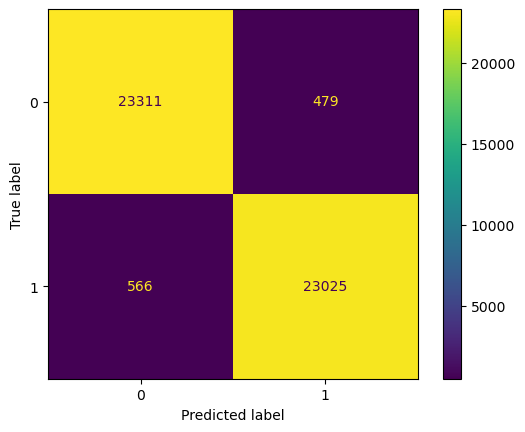

In [20]:
from sklearn import metrics

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()
